# Gráfica asociada a datos

**Nombre:** Heriberto Espino Montelongo

**Materia:** Análisis Discreto

**Clave:** O24-LDS1011-1

**Fecha:** 4 de diciembre de 2024

#### Contenido de la actividad

El siguiente archivo consiste de un conjunto $D$ de 145 pacientes, filas, cada uno puede ser representado como un punto en $\R^5$, omitiendo las columnas de "Patient number" y "Clinical Classification". Realice un programa para construir la gráfica $G_r(D)=(V,E)$ en donde los vértices son los elementos de $D$ y dados $p_i, p,j \in D$, $(p_i, p,j) \in E$ si y sólo si su distancia es menor que $r$, donde $r > 0$.

Diabetes.csv


Sugerencia: Puede definir la matriz $D=(d_{ij})$ de distancias, donde $d_{ij} = ||p_i - p_j||$.

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
r = 50

In [20]:
df = pd.read_csv('Diabetes.csv')
df

,Patient number,Relative weight,Fasting plasma glucose,Glucose area,Insulin area,SSPG,Clinical Classification
0,1,0.81,80,356,124,55,3
1,2,0.95,97,289,117,76,3
2,3,0.94,105,319,143,105,3
3,4,1.04,90,356,199,108,3
4,5,1.00,90,323,240,143,3
...,...,...,...,...,...,...,...
140,141,1.05,353,1428,41,480,1
141,142,0.91,180,923,77,150,1
142,143,0.90,213,1025,29,209,1
143,144,1.11,328,1246,124,442,1


In [22]:
data = df.iloc[:, 1:6].values

In [ ]:
def graph(data, r):

    dist_matrix = np.zeros((len(data), len(data)))

    for i in range(len(data)):
        for j in range(len(data)):
            dist_matrix[i, j] = np.sqrt(np.sum((data[i] - data[j]) ** 2))

    G = nx.Graph()

    for i in range(len(data)):
        G.add_node(i)

    for i in range(len(data)):
        for j in range(i + 1, len(data)): # no lazos
            if dist_matrix[i, j] < r:
                G.add_edge(i, j)

    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True, node_size=300, node_color='#061A74', font_size=6, font_color='white', font_weight='bold', font_family='Century Gothic', edge_color='black', linewidths=0.5, width=0.5)
    plt.title(f'\nG_r(D), r = {r}', fontsize=20, color='black', pad=20, fontweight='bold', fontname='Century Gothic')
    plt.show()

    return G

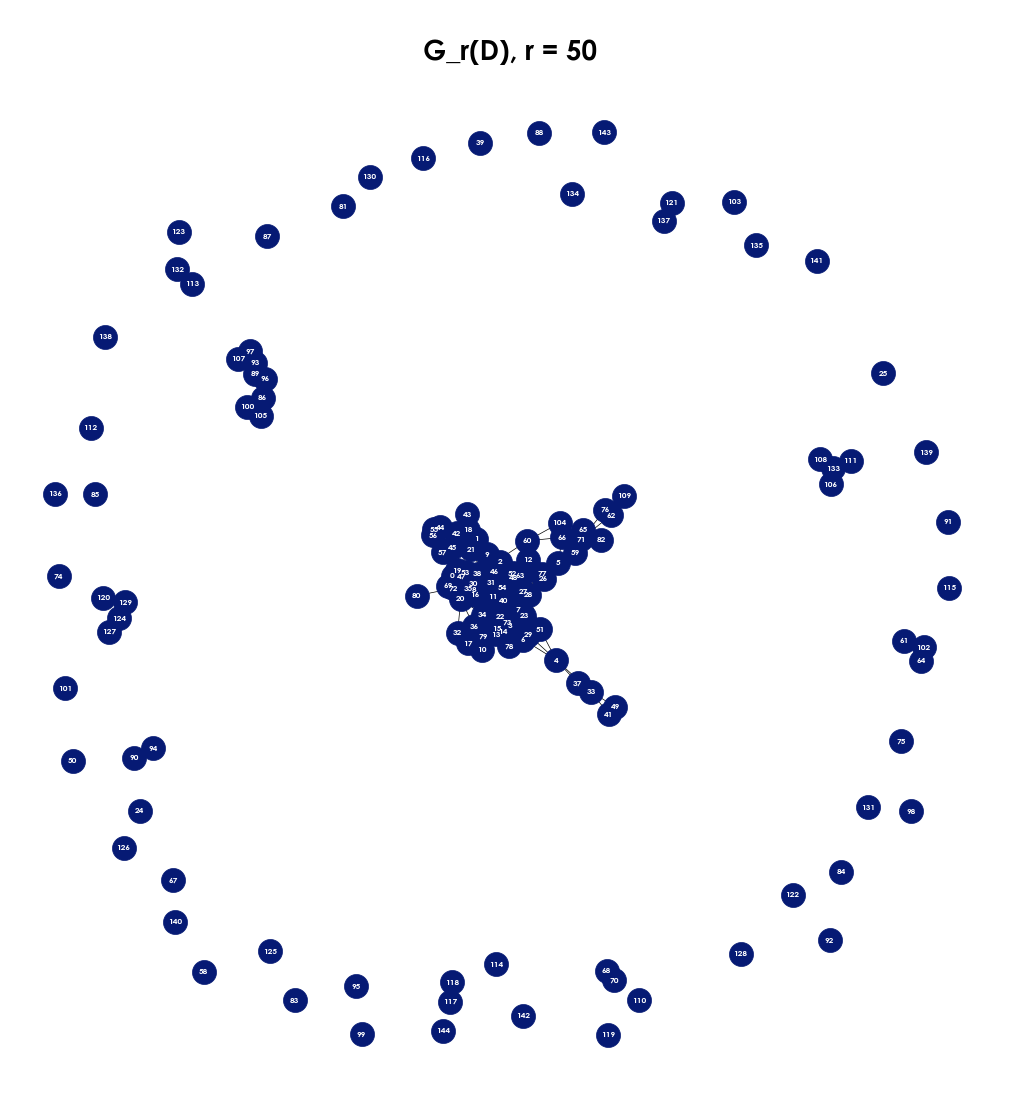

In [29]:
G = graph(data, r)

## **Cerradura transitiva**

In [9]:
def warshall(V, R):

    n = len(V)

    M = np.zeros((n, n), dtype=bool)
    for (i, j) in R:
        M[i-1][j-1] = True
    
    C = M.copy()
    CP = C.copy()
    
    iteracion = 1
    cambio = True
    
    while iteracion <= n and cambio:
        cambio = False
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    CP[i][j] = CP[i][j] or (C[i][k] and M[k][j])
                    cambio = cambio or (C[i][j] != CP[i][j])
        C = CP.copy()
        iteracion += 1
    
    C = C.astype(int)
    
    return C

In [24]:
V = list(G.nodes())
E = G.edges()

In [ ]:
cerradura_trans = warshall(V, E)

<function warshall at 0x000002782DED9B20>


In [ ]:
np.savetxt('diabetes-w.csv', cerradura_trans, fmt='%d', delimiter='  ')

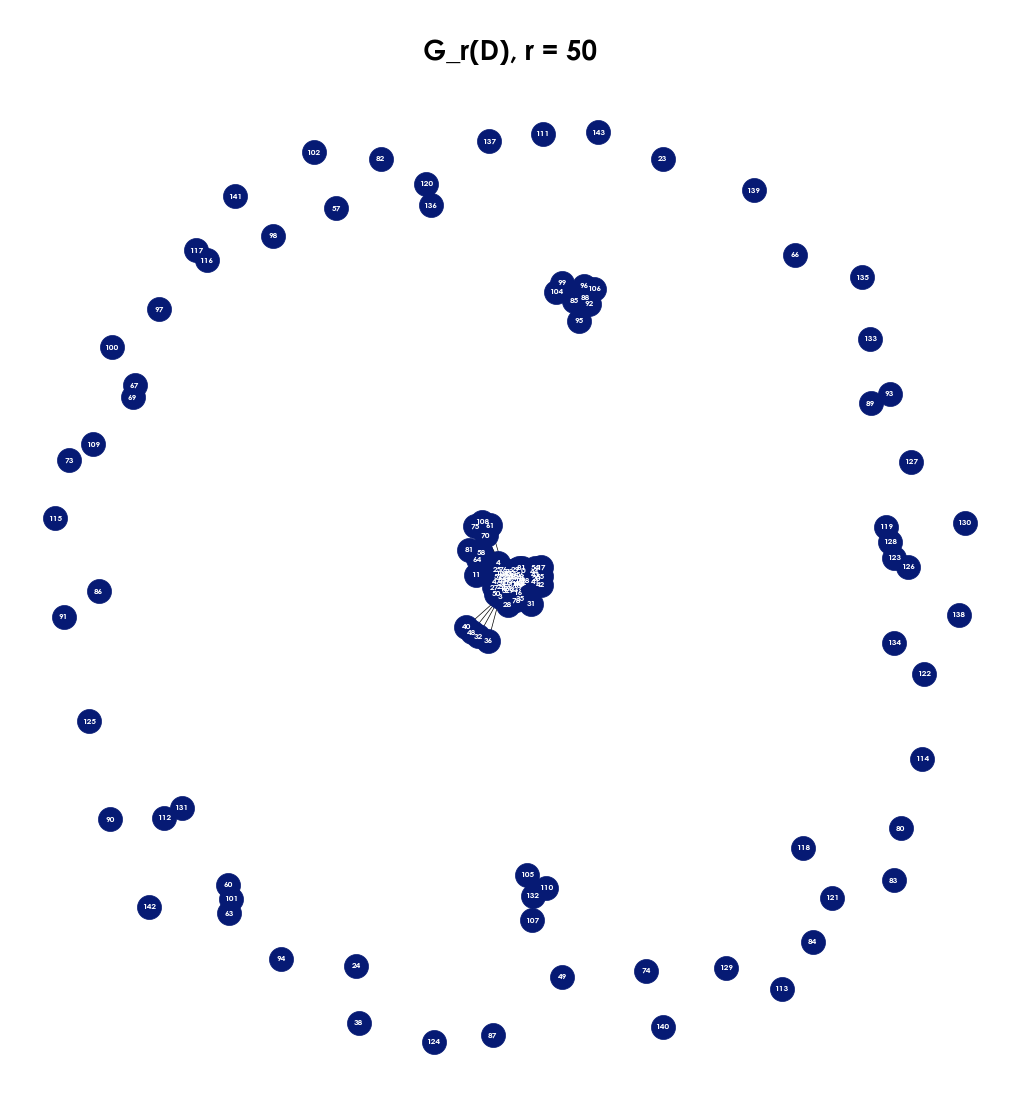

In [ ]:
G = nx.from_numpy_array(cerradura_trans)

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=300, node_color='#061A74', font_size=6, font_color='white', font_weight='bold', font_family='Century Gothic', edge_color='black', linewidths=0.5, width=0.5)
plt.title(f'\nG_r(D), r = {r}', fontsize=20, color='black', pad=20, fontweight='bold', fontname='Century Gothic')
plt.show()